In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from fiona.crs import from_epsg
import datetime as dt

# Read Files & Create Datetime

In [2]:
df= pd.read_csv(r"M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\Parks Historical Permits\190612_ParksPermits.csv",index_col=0)

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df2= df[~df.duplicated()].copy().reset_index(drop=True)

In [4]:
df2.shape

(228844, 12)

In [5]:
df2['start_date_time']= pd.to_datetime(df2['start_date_time'],format="%Y/%m/%d")
df2['end_date_time']= pd.to_datetime(df2['end_date_time'],format="%Y/%m/%d")

In [6]:
df2['year']= df2['start_date_time'].dt.year
df2['start_time']= df2['start_date_time'].dt.time
df2['end_time']= df2['end_date_time'].dt.time

In [7]:
df2['date']= df2['start_date_time'].dt.date
df2['dow']= df2['start_date_time'].dt.weekday

# Time Series and Weather
* Time series histogram
* Time series and weather histogram

In [8]:
plt_path= r"M:\NY4P Metrics Research 18034\05_GRAPHICS\Charts Graphs Diagrams\190614_plt saves"

In [9]:
df2.resample('W-Mon',on='start_date_time').agg({'event_id':'count'}).sort_values(by='start_date_time');

In [10]:
path_weather= r'M:\NY4P Metrics Research 18034\03_GIS+ANALYSIS\01_DATA\RAW\NOAA Weather\Daily Summaries'

In [11]:
w1= pd.read_csv(join(path_weather, '080101_151231.csv'))
w2= pd.read_csv(join(path_weather, '160101_190513.csv'))
w3= pd.read_csv(join(path_weather, '080101_101231.csv'))
w4= pd.read_csv(join(path_weather, '110101_130405.csv'))

C:\Users\Jennah\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (7,9,11,13,21,23,25,27,29,31,33,35,37,39,41,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
temps= \
pd.concat(    
    [w1[(w1['TAVG'].notna())&(w1['STATION']=='USW00014732')][['STATION', 'NAME', 'DATE', 'TAVG']],
     w2[(w2['TAVG'].notna())&(w2['STATION']=='USW00014732')][['STATION', 'NAME', 'DATE', 'TAVG']],
    w3[(w3['TAVG'].notna())&(w3['STATION']=='USW00014732')][['STATION', 'NAME', 'DATE', 'TAVG']],
    w4[(w4['TAVG'].notna())&(w4['STATION']=='USW00014732')][['STATION', 'NAME', 'DATE', 'TAVG']]],
    sort=False, ignore_index=True
)

In [13]:
temps['DATE']

0       2013-04-01
1       2013-04-02
2       2013-04-03
3       2013-04-04
4       2013-04-05
5       2013-04-06
6       2013-04-07
7       2013-04-08
8       2013-04-09
9       2013-04-10
10      2013-04-11
11      2013-04-12
12      2013-04-13
13      2013-04-14
14      2013-04-15
15      2013-04-16
16      2013-04-17
17      2013-04-18
18      2013-04-19
19      2013-04-20
20      2013-04-21
21      2013-04-22
22      2013-04-23
23      2013-04-24
24      2013-04-25
25      2013-04-26
26      2013-04-27
27      2013-04-28
28      2013-04-29
29      2013-04-30
           ...    
4117    2013-03-02
4118    2013-03-03
4119    2013-03-04
4120    2013-03-05
4121    2013-03-06
4122    2013-03-07
4123    2013-03-08
4124    2013-03-09
4125    2013-03-10
4126    2013-03-11
4127    2013-03-12
4128    2013-03-13
4129    2013-03-14
4130    2013-03-15
4131    2013-03-16
4132    2013-03-17
4133    2013-03-18
4134    2013-03-19
4135    2013-03-20
4136    2013-03-21
4137    2013-03-22
4138    2013

In [14]:
temps['DATE']= pd.to_datetime(temps['DATE'],format="%Y-%m-%d")

In [15]:
temps['DATE'].sort_values()

2230   2008-01-01
2231   2008-01-02
2232   2008-01-03
2233   2008-01-04
2234   2008-01-05
2235   2008-01-06
2236   2008-01-07
2237   2008-01-08
2238   2008-01-09
2239   2008-01-10
2240   2008-01-11
2241   2008-01-12
2242   2008-01-13
2243   2008-01-14
2244   2008-01-15
2245   2008-01-16
2246   2008-01-17
2247   2008-01-18
2248   2008-01-19
2249   2008-01-20
2250   2008-01-21
2251   2008-01-22
2252   2008-01-23
2253   2008-01-24
2254   2008-01-25
2255   2008-01-26
2256   2008-01-27
2257   2008-01-28
2258   2008-01-29
2259   2008-01-30
          ...    
2200   2019-04-10
2201   2019-04-11
2202   2019-04-12
2203   2019-04-13
2204   2019-04-14
2205   2019-04-15
2206   2019-04-16
2207   2019-04-17
2208   2019-04-18
2209   2019-04-19
2210   2019-04-20
2211   2019-04-21
2212   2019-04-23
2213   2019-04-24
2214   2019-04-25
2215   2019-04-26
2216   2019-04-27
2217   2019-04-28
2218   2019-04-29
2219   2019-04-30
2220   2019-05-01
2221   2019-05-02
2222   2019-05-03
2223   2019-05-04
2224   201

In [16]:
temps.rename(columns={'DATE':'start_date_time'}, inplace=True)

In [17]:
temps.index= temps['start_date_time']

In [18]:
hist= df2.resample('W-Mon', on='start_date_time').agg({'event_id':'count'}).sort_values(by='start_date_time').join(temps[['TAVG']])

In [19]:
hist[hist['TAVG'].notna()]

,event_id,TAVG
start_date_time,,
2008-01-14,1,36.5
2008-01-21,1,22.0
2008-01-28,2,36.0
2008-02-04,2,38.5
2008-02-11,2,18.5
2008-02-18,1,53.0
2008-02-25,0,41.0
2008-03-03,0,43.5
2008-03-10,1,37.0


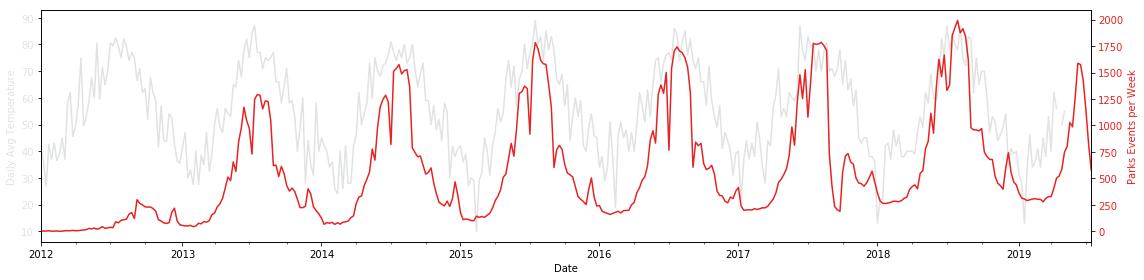

In [25]:
fig, ax1 = plt.subplots(figsize=(16,4))

color = '#E1E3E3'
ax1.set_ylabel('Daily Avg Temperature', color=color)
hist['TAVG'].plot(color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = '#E82222'
ax2.set_ylabel('Parks Events per Week', color=color)
hist[hist['year']>=2012]['event_id'].plot(color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_xlabel('Date')

fig.tight_layout()
fig= plt.gcf()
#plt.savefig(join(plt_path,'weathertimeseries.pdf'))
plt.show();

In [ ]:
hist[hist['event_id']<50]

In [21]:
hist['year']=hist.index.year

In [22]:
x= hist[hist['year']>=2014].min()[0]

In [23]:
x

65.0

In [24]:
hist.reset_index()

,start_date_time,event_id,TAVG,year
0,2008-01-14,1,36.5,2008
1,2008-01-21,1,22.0,2008
2,2008-01-28,2,36.0,2008
3,2008-02-04,2,38.5,2008
4,2008-02-11,2,18.5,2008
5,2008-02-18,1,53.0,2008
6,2008-02-25,0,41.0,2008
7,2008-03-03,0,43.5,2008
8,2008-03-10,1,37.0,2008
9,2008-03-17,0,40.5,2008


In [ ]:
hist[hist['event_id']==x]

# Event Categories

In [26]:
df2['event_clean']= df2['event_name'].str.lower().str.replace("[.;,:']",'').str.strip()

In [27]:
mask_bbq= df2['event_clean'].str.lower().str.contains('bbq')
mask_barbecue= df2['event_clean'].str.lower().str.contains('barbecue')
mask_picnic= df2['event_clean'].str.lower().str.contains('picnic')
mask_farmers= df2['event_clean'].str.lower().str.contains('farmers market')
mask_party= df2['event_clean'].str.lower().str.contains('party')
mask_celebration= df2['event_clean'].str.lower().str.contains('celebration|fair')

In [28]:
#Free
mask_free= df2['event_clean'].str.contains('free')
#Athletics
mask_sports= df2['event_clean'].str.contains("zumba|basketball|baseball|\
football|cycling|run|sport|bocce|juggling|bike|field|gymnastics|soccer|\
skate|athletic|yoga|cross country|swim|hike|recreation|game|frisbee|handball")

#Outdoor Recreation/Nature
mask_nature= df2['event_clean'].str.contains("natur|outdoor|fishing|walk|river")

In [29]:
#Movies and entertainment
mask_allentert= df2['event_clean'].str.contains("music|stage|entertainment|concert|performance|movie|film|dance")

In [30]:
df2.loc[mask_sports,'Sports']=1
df2.loc[mask_allentert,'Entertainment']=1
df2.loc[mask_bbq|mask_barbecue|mask_farmers|mask_picnic,'Barbecue']=1
df2.loc[mask_party|mask_celebration,'PartyCel']=1
df2.loc[mask_nature,'Nature']=1
df2['Total']=1

In [31]:
df2['Month']=df2['start_date_time'].dt.month

In [32]:
df2['Year']=df2['start_date_time'].dt.year

In [33]:
categ= df2.groupby(['Month','Year'])['Sports','Entertainment','Barbecue','PartyCel','Nature','Total'].sum()

In [34]:
categ2= categ.mean(level=0)

In [35]:
categ2['PSports']=categ2['Sports']*100/categ2['Total']
categ2['PEnter']=categ2['Entertainment']*100/categ2['Total']
categ2['PBarb']=categ2['Barbecue']*100/categ2['Total']
categ2['PPartyCel']=categ2['PartyCel']*100/categ2['Total']
categ2['PNature']=categ2['Nature']*100/categ2['Total']

In [36]:
categ2['Other']= categ2.loc[:,'Total']-categ2.loc[:,'Sports':'Nature'].sum(axis=1)
categ2['POther']= categ2['Other']*100/categ2['Total']

In [37]:
categ2

,Sports,Entertainment,Barbecue,PartyCel,Nature,Total,PSports,PEnter,PBarb,PPartyCel,PNature,Other,POther
Month,,,,,,,,,,,,,
1,52.909091,0.272727,0.727273,15.090909,5.000000,496.727273,10.651537,0.054905,0.146413,3.038067,1.006589,422.727273,85.102489
2,44.250000,0.916667,0.916667,14.750000,5.583333,414.500000,10.675513,0.221150,0.221150,3.558504,1.347004,348.083333,83.976679
3,79.416667,4.916667,3.000000,39.416667,11.000000,566.833333,14.010585,0.867392,0.529256,6.953837,1.940606,429.083333,75.698324
4,225.916667,18.333333,30.000000,144.833333,31.666667,1034.083333,21.847046,1.772907,2.901120,14.005963,3.062293,583.333333,56.410670
5,382.750000,51.666667,118.500000,332.583333,62.333333,2033.916667,18.818372,2.540255,5.826197,16.351866,3.064695,1086.083333,53.398615
6,556.916667,177.333333,388.833333,554.250000,69.333333,3351.500000,16.616938,5.291163,11.601770,16.537371,2.068725,1604.833333,47.884032
7,541.333333,210.000000,360.166667,350.333333,51.166667,3465.666667,15.619890,6.059440,10.392421,10.108685,1.476387,1952.666667,56.343176
8,594.200000,223.000000,524.400000,444.100000,63.600000,3852.900000,15.422150,5.787848,13.610527,11.526383,1.650705,2003.600000,52.002388
9,299.800000,64.300000,233.800000,313.700000,45.600000,1815.600000,16.512448,3.541529,12.877286,17.278035,2.511566,858.400000,47.279136


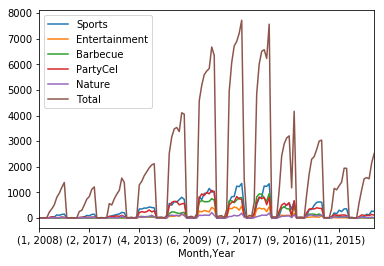

In [38]:
categ.plot()

KeyError: 'PFarmers'

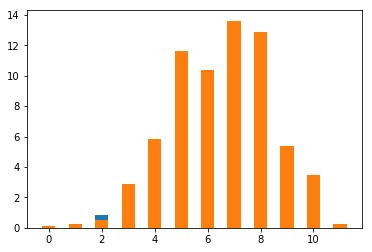

In [39]:
N = 12
r= 5
ind = np.arange(N)    # the x locations for the groups
width = 0.5       # the width of the bars: can also be len(x) sequence
bottom=categ2['PEnter']

#1= plt.bar(ind,categ2['POther'],width,label='Other')
p2= plt.bar(ind, categ2['PEnter'], width,label='Entertainment')
p3= plt.bar(ind, categ2['PBarb'], width, label='Barbecues')
p4= plt.bar(ind,categ2['PFarmers'],width, label='Farmers Market')
p5= plt.bar(ind,categ2['PPicnic'],width, label='Picnics')
p6= plt.bar(ind,categ2['PartyCel'],width, label='Party or Celebration')
p7= plt.bar(ind, categ2['PSports'], width,label='Sports')

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xticks(ind,categ2.index)

fig= plt.gcf()
fig.set_size_inches(14,10)
#plt.savefig(join(graph_path,'barperduplicates2.pdf'))

FileNotFoundError: [Errno 2] No such file or directory: 'M:\\NY4P Metrics Research 18034\\05_GRAPHICS\\Charts Graphs Diagrams\\190614_plt saves\\barcateg2.pdf'

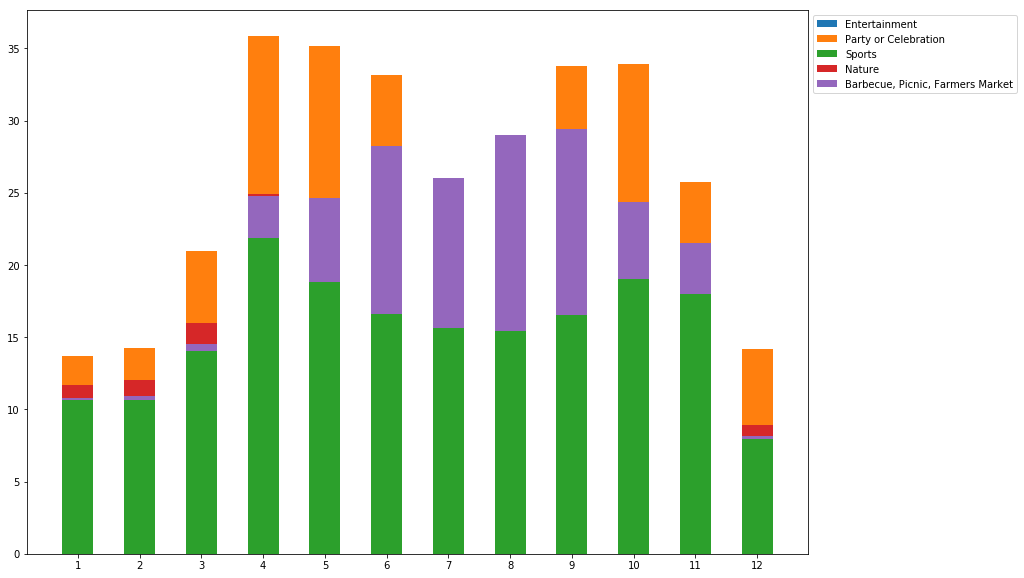

In [41]:
N = 12
ind = np.arange(N)
width = 0.5       # the width of the bars: can also be len(x) sequence
b=categ2['PSports']

#p1= plt.bar(ind,categ2['POther'],width,label='Other')
p2= plt.bar(ind, categ2['PEnter'], width,label='Entertainment',bottom=b)
#p4= plt.bar(ind,categ2['PFarmers'],width, label='Farmers Market',bottom=b)
#p5= plt.bar(ind,categ2['PPicnic'],width, label='Picnics',bottom=b)
p6= plt.bar(ind,categ2['PPartyCel'],width, label='Party or Celebration',bottom=b)
p7= plt.bar(ind, categ2['PSports'], width,label='Sports')
p8= plt.bar(ind, categ2['PNature'], width,label='Nature',bottom=b)
p8= plt.bar(ind, categ2['PBarb'], width,label='Barbecue, Picnic, Farmers Market',bottom=b)

plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xticks(ind,categ2.index)

fig= plt.gcf()
fig.set_size_inches(14,10)
plt.savefig(join(plt_path,'barcateg2.pdf'))

In [44]:
np.arange(100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [45]:
 categ2.loc[:,'PSports':]

,PSports,PEnter,PBarb,PPartyCel,PNature,Other,POther
Month,,,,,,,
1,10.651537,0.054905,0.146413,3.038067,1.006589,422.727273,85.102489
2,10.675513,0.221150,0.221150,3.558504,1.347004,348.083333,83.976679
3,14.010585,0.867392,0.529256,6.953837,1.940606,429.083333,75.698324
4,21.847046,1.772907,2.901120,14.005963,3.062293,583.333333,56.410670
5,18.818372,2.540255,5.826197,16.351866,3.064695,1086.083333,53.398615
6,16.616938,5.291163,11.601770,16.537371,2.068725,1604.833333,47.884032
7,15.619890,6.059440,10.392421,10.108685,1.476387,1952.666667,56.343176
8,15.422150,5.787848,13.610527,11.526383,1.650705,2003.600000,52.002388
9,16.512448,3.541529,12.877286,17.278035,2.511566,858.400000,47.279136


## Table of Sample Descriptions